# Load Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [3]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [4]:
totalClass = 4
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [5]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(20000, 32, 32, 3)
(20000, 4)
(4000, 32, 32, 3)
(4000, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


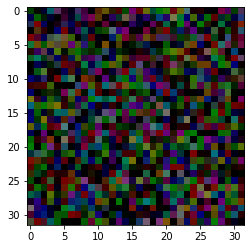

In [6]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

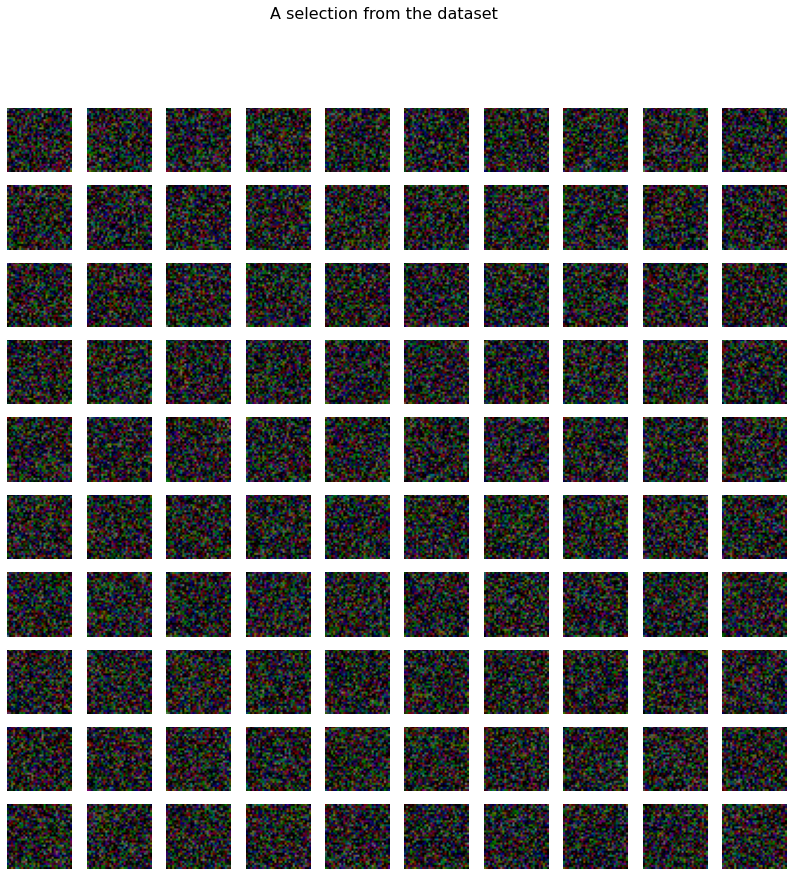

In [7]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [8]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [9]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 11s 33ms/step - loss: 1.3887 - accuracy: 0.2500
test loss, test acc: [1.3886799812316895, 0.25]
Evaluate on test data
8/8 [==============================] - 1s 177ms/step - loss: 1.3887 - accuracy: 0.2500
test loss, test acc: [1.3886557817459106, 0.25]


In [10]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 9s 32ms/step - loss: 1.3871 - accuracy: 0.2488 - val_loss: 1.3865 - val_accuracy: 0.2522
Epoch 2/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3864 - accuracy: 0.2554 - val_loss: 1.3870 - val_accuracy: 0.2500
Epoch 3/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3863 - accuracy: 0.2533 - val_loss: 1.3867 - val_accuracy: 0.2480
Epoch 4/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3859 - accuracy: 0.2586 - val_loss: 1.3869 - val_accuracy: 0.2498
Epoch 5/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3857 - accuracy: 0.2624 - val_loss: 1.3868 - val_accuracy: 0.2495
Epoch 6/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3853 - accuracy: 0.2639 - val_loss: 1.3866 - val_accuracy: 0.2492
Epoch 7/250
200/200 [==============================] - 6s 31ms/step - loss: 1.3848 - accuracy: 0.2683 - val_loss: 1.3867 - val_accuracy:

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 30ms/step - loss: 6.0442e-07 - accuracy: 1.0000
test loss, test acc: [6.044174369890243e-07, 1.0]
Evaluate on test data
8/8 [==============================] - 0s 29ms/step - loss: 10.6567 - accuracy: 0.2395
test loss, test acc: [10.656694412231445, 0.2395000010728836]


# Small

In [12]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 1s 7ms/step - loss: 26.1142 - accuracy: 0.2504
test loss, test acc: [26.114208221435547, 0.2504499852657318]
Evaluate on test data
8/8 [==============================] - 0s 21ms/step - loss: 26.1167 - accuracy: 0.2495
test loss, test acc: [26.116680145263672, 0.24950000643730164]


In [14]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 3s 8ms/step - loss: 5.4487 - accuracy: 0.2478 - val_loss: 1.3869 - val_accuracy: 0.2467
Epoch 2/250
200/200 [==============================] - 1s 7ms/step - loss: 1.4084 - accuracy: 0.2427 - val_loss: 1.3865 - val_accuracy: 0.2490
Epoch 3/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3990 - accuracy: 0.2499 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3939 - accuracy: 0.2484 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3935 - accuracy: 0.2500 - val_loss: 1.3863 - val_accuracy: 0.2505
Epoch 6/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3939 - accuracy: 0.2526 - val_loss: 1.3863 - val_accuracy: 0.2498
Epoch 7/250
200/200 [==============================] - 1s 7ms/step - loss: 1.3921 - accuracy: 0.2508 - val_loss: 1.3863 - val_accuracy: 0.2490

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 0s 6ms/step - loss: 0.8580 - accuracy: 0.8740
test loss, test acc: [0.8580196499824524, 0.8740000128746033]
Evaluate on test data
8/8 [==============================] - 0s 6ms/step - loss: 1.4754 - accuracy: 0.2488
test loss, test acc: [1.47543203830719, 0.2487500011920929]


#tNet

In [16]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 3s 40ms/step - loss: 1.4908 - accuracy: 0.2485
test loss, test acc: [1.4907819032669067, 0.2485000044107437]
Evaluate on test data
8/8 [==============================] - 1s 118ms/step - loss: 1.4835 - accuracy: 0.2432
test loss, test acc: [1.4835267066955566, 0.24324999749660492]


In [18]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 11s 43ms/step - loss: 1.5824 - accuracy: 0.2542 - val_loss: 1.4200 - val_accuracy: 0.2528
Epoch 2/250
200/200 [==============================] - 8s 40ms/step - loss: 1.3543 - accuracy: 0.3417 - val_loss: 1.4379 - val_accuracy: 0.2467
Epoch 3/250
200/200 [==============================] - 8s 40ms/step - loss: 1.1656 - accuracy: 0.5013 - val_loss: 1.4815 - val_accuracy: 0.2455
Epoch 4/250
200/200 [==============================] - 8s 40ms/step - loss: 0.9590 - accuracy: 0.6314 - val_loss: 1.5721 - val_accuracy: 0.2533
Epoch 5/250
200/200 [==============================] - 8s 40ms/step - loss: 0.7459 - accuracy: 0.7325 - val_loss: 1.7667 - val_accuracy: 0.2505
Epoch 6/250
200/200 [==============================] - 8s 40ms/step - loss: 0.5479 - accuracy: 0.8213 - val_loss: 2.0143 - val_accuracy: 0.2555
Epoch 7/250
200/200 [==============================] - 8s 40ms/step - loss: 0.3907 - accuracy: 0.8812 - val_loss: 2.2348 - val_accuracy

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 39ms/step - loss: 0.0019 - accuracy: 0.9995
test loss, test acc: [0.0019115930190309882, 0.9995499849319458]
Evaluate on test data
8/8 [==============================] - 0s 39ms/step - loss: 5.2198 - accuracy: 0.2522
test loss, test acc: [5.21980619430542, 0.25224998593330383]


# ConvNet

In [20]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 4s 49ms/step - loss: 3.1541 - accuracy: 0.2504
test loss, test acc: [3.154071807861328, 0.25040000677108765]
Evaluate on test data
8/8 [==============================] - 2s 285ms/step - loss: 3.1419 - accuracy: 0.2490
test loss, test acc: [3.1418521404266357, 0.24899999797344208]


In [22]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
200/200 [==============================] - 10s 41ms/step - loss: 1.4763 - accuracy: 0.2512 - val_loss: 1.3868 - val_accuracy: 0.2450
Epoch 2/250
200/200 [==============================] - 8s 39ms/step - loss: 1.3866 - accuracy: 0.2481 - val_loss: 1.3864 - val_accuracy: 0.2492
Epoch 3/250
200/200 [==============================] - 8s 39ms/step - loss: 1.3863 - accuracy: 0.2476 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/250
200/200 [==============================] - 8s 39ms/step - loss: 1.3865 - accuracy: 0.2499 - val_loss: 1.3864 - val_accuracy: 0.2503
Epoch 5/250
200/200 [==============================] - 8s 40ms/step - loss: 1.3865 - accuracy: 0.2484 - val_loss: 1.3864 - val_accuracy: 0.2492
Epoch 6/250
200/200 [==============================] - 8s 39ms/step - loss: 1.3864 - accuracy: 0.2468 - val_loss: 1.3864 - val_accuracy: 0.2498
Epoch 7/250
200/200 [==============================] - 8s 39ms/step - loss: 1.3864 - accuracy: 0.2447 - val_loss: 1.3863 - val_accuracy

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
40/40 [==============================] - 2s 45ms/step - loss: 1.3863 - accuracy: 0.2500
test loss, test acc: [1.3862944841384888, 0.24995000660419464]
Evaluate on test data
8/8 [==============================] - 0s 45ms/step - loss: 1.3863 - accuracy: 0.2500
test loss, test acc: [1.3862946033477783, 0.25]


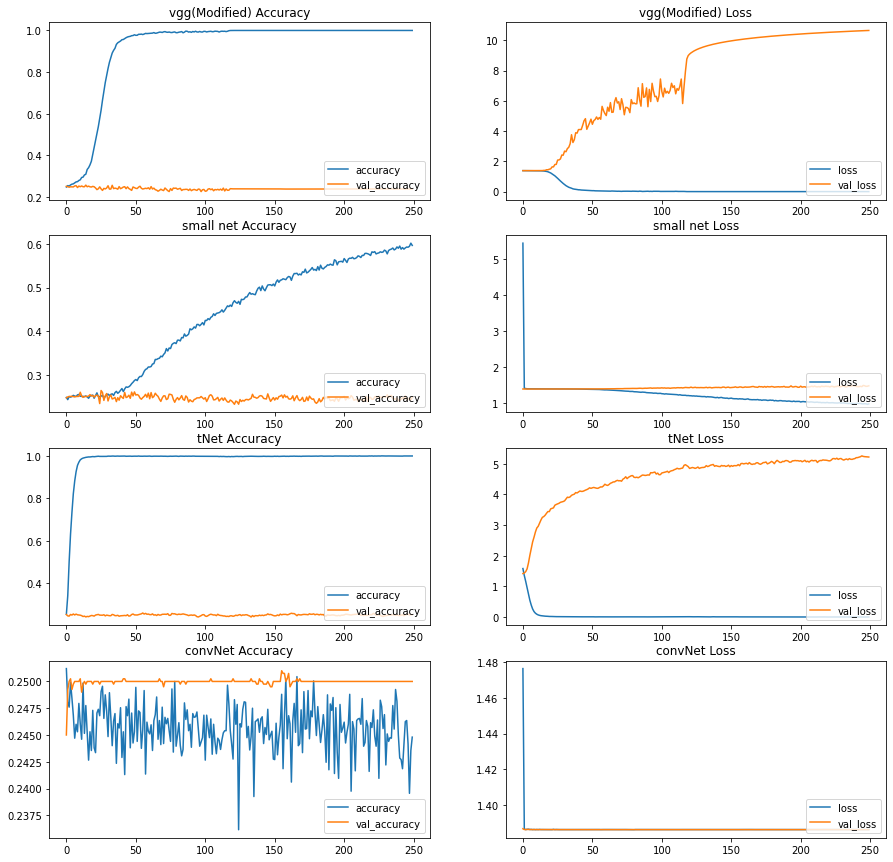

In [24]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
